In [ ]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)
num_samples = 1000

# Generate random data for the features
data = {
    'transaction_amount': np.random.uniform(1, 1000, num_samples),
    'transaction_time': np.random.uniform(0, 24, num_samples),
    'customer_age': np.random.randint(18, 90, num_samples),
    'customer_gender': np.random.choice(['M', 'F'], num_samples),
    'merchant_category': np.random.choice(['Grocery', 'Electronics', 'Clothing', 'Restaurants'], num_samples),
    'is_fraud': np.random.choice([0, 1], num_samples, p=[0.95, 0.05])  # 5% fraud
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['customer_gender', 'merchant_category'], drop_first=True)

# Save the dataset to a CSV file
csv_file_path = 'credit_card_fraud_detection.csv'
df.to_csv(csv_file_path, index=False)

print(f"CSV file created at: {csv_file_path}")


CSV file created at: credit_card_fraud_detection.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.0545230453638649, -0.019969670078536783)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

accuracy, conf_matrix, class_report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9433333333333334,
 array([[283,   0],
        [ 17,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       283\n           1       0.00      0.00      0.00        17\n\n    accuracy                           0.94       300\n   macro avg       0.47      0.50      0.49       300\nweighted avg       0.89      0.94      0.92       300\n')

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

accuracy_nb, conf_matrix_nb, class_report_nb


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9433333333333334,
 array([[283,   0],
        [ 17,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       283\n           1       0.00      0.00      0.00        17\n\n    accuracy                           0.94       300\n   macro avg       0.47      0.50      0.49       300\nweighted avg       0.89      0.94      0.92       300\n')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
feature_importances = rf_model.feature_importances_

accuracy_rf, conf_matrix_rf, class_report_rf, feature_importances


(0.94,
 array([[282,   1],
        [ 17,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       283\n           1       0.00      0.00      0.00        17\n\n    accuracy                           0.94       300\n   macro avg       0.47      0.50      0.48       300\nweighted avg       0.89      0.94      0.91       300\n',
 array([0.32918863, 0.3402443 , 0.22997737, 0.03169488, 0.02416558,
        0.02332948, 0.02139976]))

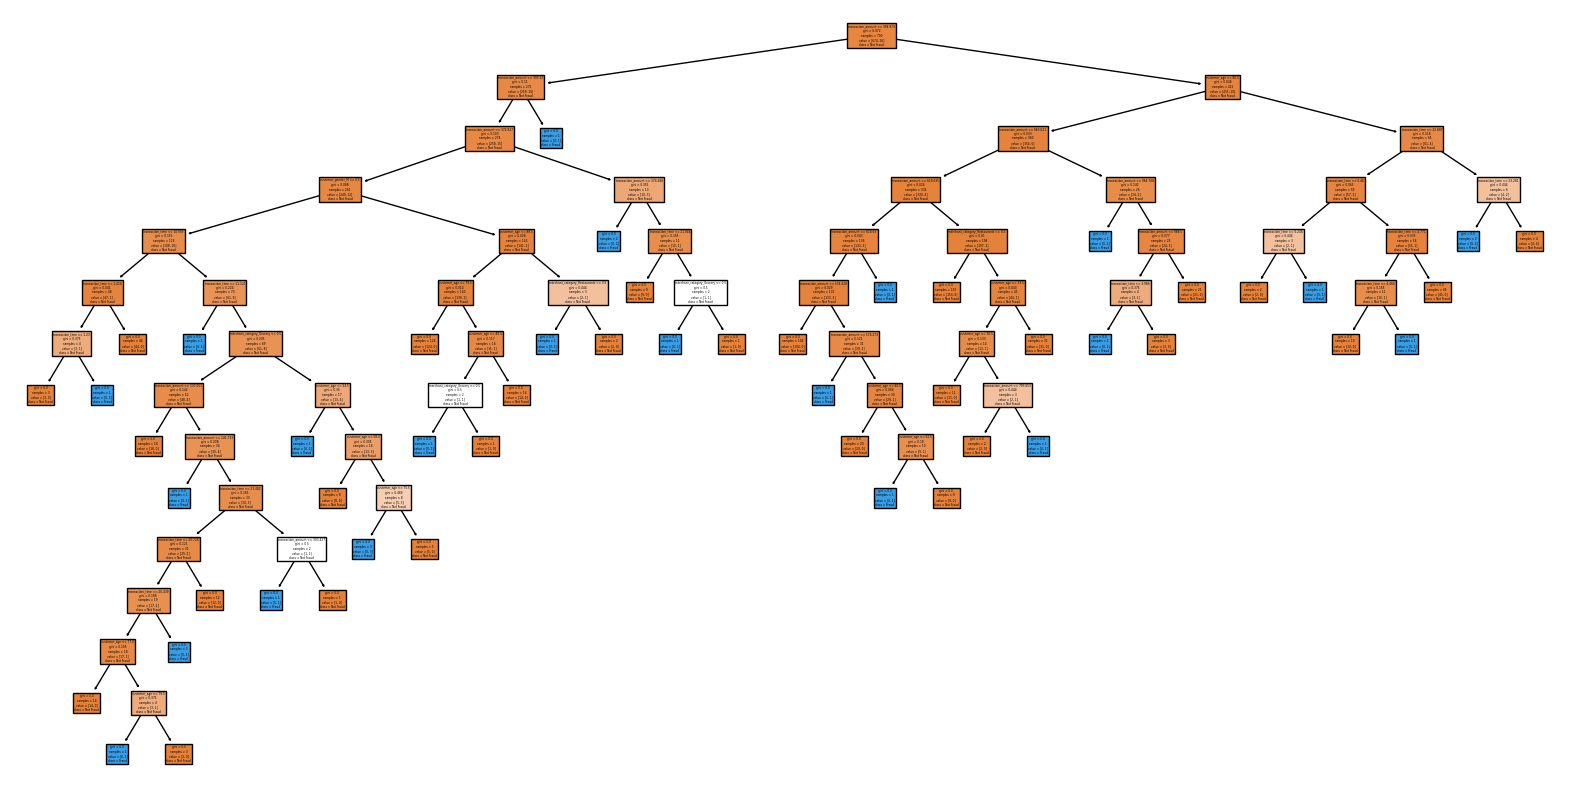

(0.9066666666666666,
 array([[272,  11],
        [ 17,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       283\n           1       0.00      0.00      0.00        17\n\n    accuracy                           0.91       300\n   macro avg       0.47      0.48      0.48       300\nweighted avg       0.89      0.91      0.90       300\n')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.show()

accuracy_dt, conf_matrix_dt, class_report_dt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('credit_card_fraud_detection.csv')

# Define features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
feature_importances = rf_model.feature_importances_

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

# Feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)


Accuracy: 0.94
Confusion Matrix:
 [[282   1]
 [ 17   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       283
           1       0.00      0.00      0.00        17

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.89      0.94      0.91       300

Feature Importances:
                          Feature  Importance
1               transaction_time    0.340244
0             transaction_amount    0.329189
2                   customer_age    0.229977
3              customer_gender_M    0.031695
4  merchant_category_Electronics    0.024166
5      merchant_category_Grocery    0.023329
6  merchant_category_Restaurants    0.021400


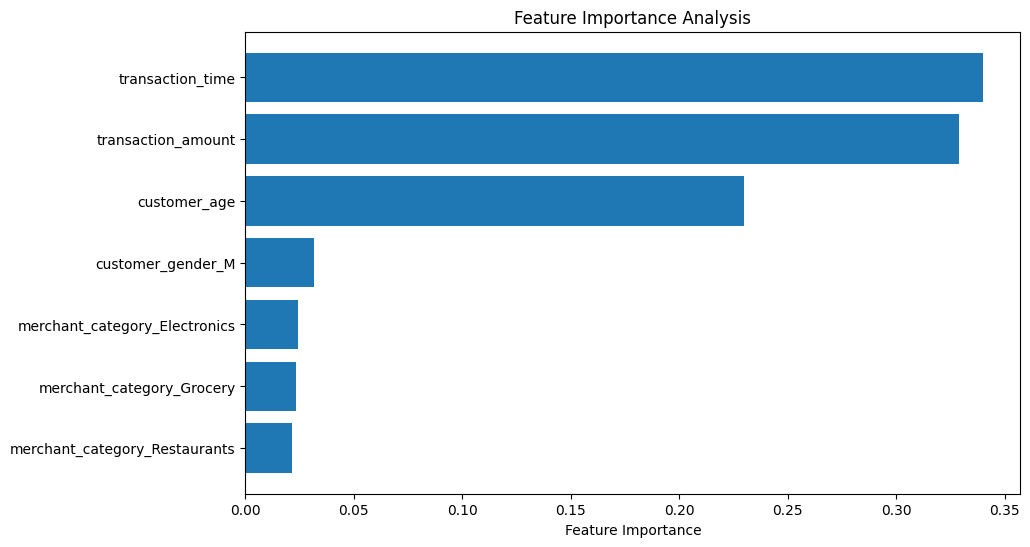

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('credit_card_fraud_detection.csv')

# Define features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)


Accuracy: 0.9066666666666666
Confusion Matrix:
 [[272  11]
 [ 17   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       283
           1       0.00      0.00      0.00        17

    accuracy                           0.91       300
   macro avg       0.47      0.48      0.48       300
weighted avg       0.89      0.91      0.90       300



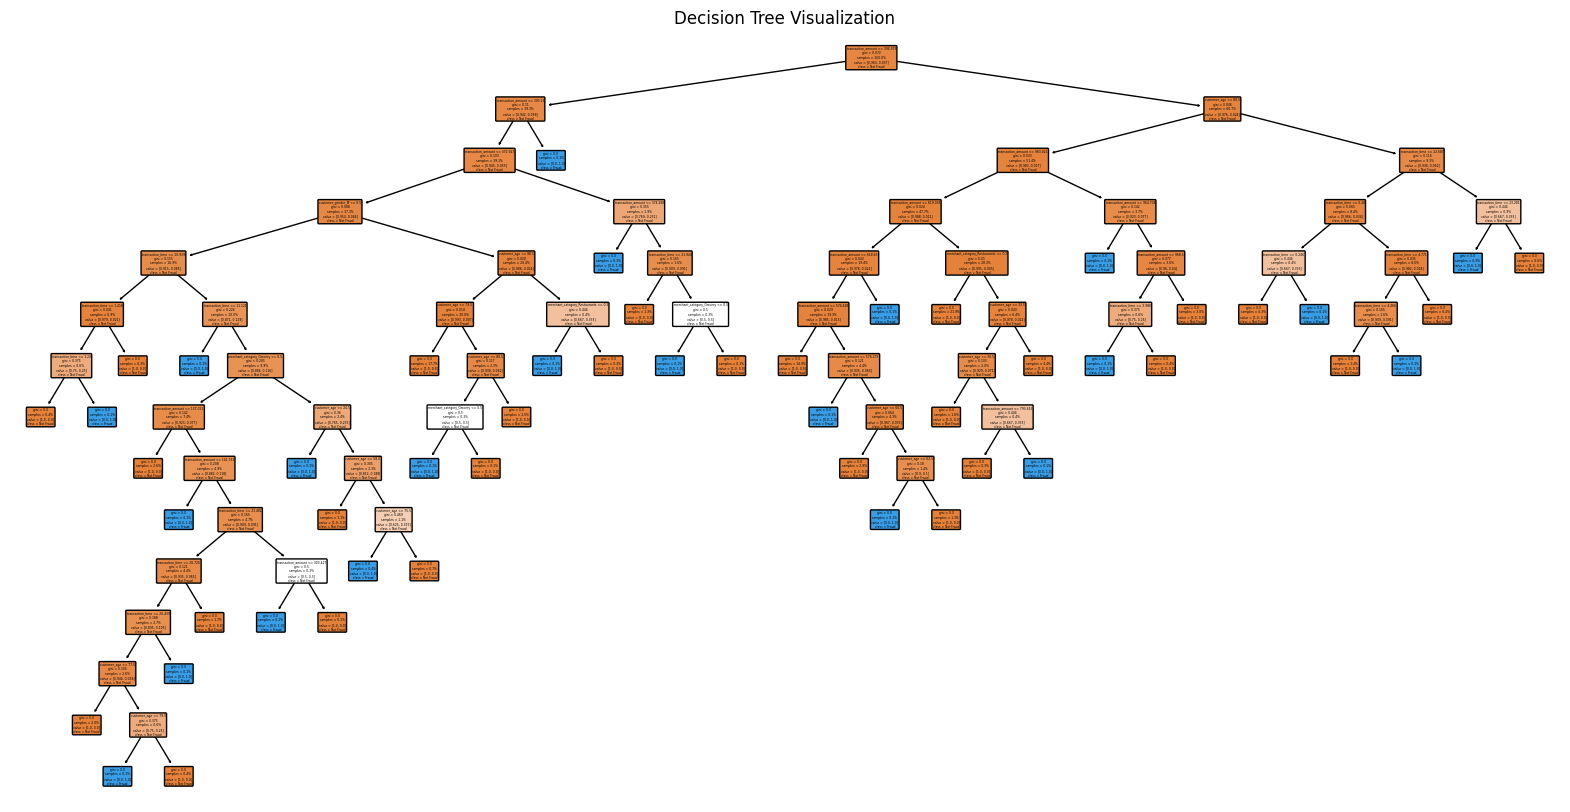

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], rounded=True, proportion=True)
plt.title('Decision Tree Visualization')
plt.show()
